<a href="https://colab.research.google.com/github/goose5304/SharedSpace/blob/main/videogame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from google.colab import files
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import chisquare

!pip install scikit-posthocs
import scikit_posthocs as sp


uploaded = files.upload()


Saving vgsales.csv to vgsales.csv


# Data Import

In [ ]:
uncleaned_df = pd.read_csv("/content/vgsales.csv")

uncleaned_df.head(100)
#uncleaned_df.describe()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


# Data Cleaning

Cleaning without removing outliers

In [ ]:
uncleaned_df.isnull().sum()

cleaned_df = uncleaned_df.dropna(subset=['Year']).copy()

cleaned_df.drop_duplicates(inplace=True)

cleaned_df['Name'] = cleaned_df['Name'].str.strip()
cleaned_df['Platform'] = cleaned_df['Platform'].str.strip()
cleaned_df['Genre'] = cleaned_df['Genre'].str.strip()
cleaned_df['Publisher'] = cleaned_df['Publisher'].str.strip()
cleaned_df['Publisher'] = cleaned_df['Publisher'].fillna('None') #make all publisher with NaN be labeled as None

cleaned_df['Year'] = cleaned_df['Year'].astype(int)

#cleaned_df.head() #cleaned data_frame with outliers

none_mask = (cleaned_df['Publisher'] == None)
filtered = cleaned_df[none_mask]
filtered.head()



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Removing outliers per region sales

In [ ]:
#note: use if without outliers, because at some circumstances, the most successful games might be considered an outlier and that might be undesirable

cleaned_df_no_out = cleaned_df.copy()
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
matcher = {}

for region in regions:
  q1 = cleaned_df_no_out[region].quantile(.25)
  q3 = cleaned_df_no_out[region].quantile(.75)
  iqr = q3 - q1

  cleaned_df_no_out = cleaned_df_no_out[(cleaned_df_no_out[region] >= q1 - 1.5*iqr) & (cleaned_df_no_out[region] <= q3 + 1.5*iqr)]


len(cleaned_df_no_out)



10054

# Video Game Genres by Sales

---



Genres by Global Sales

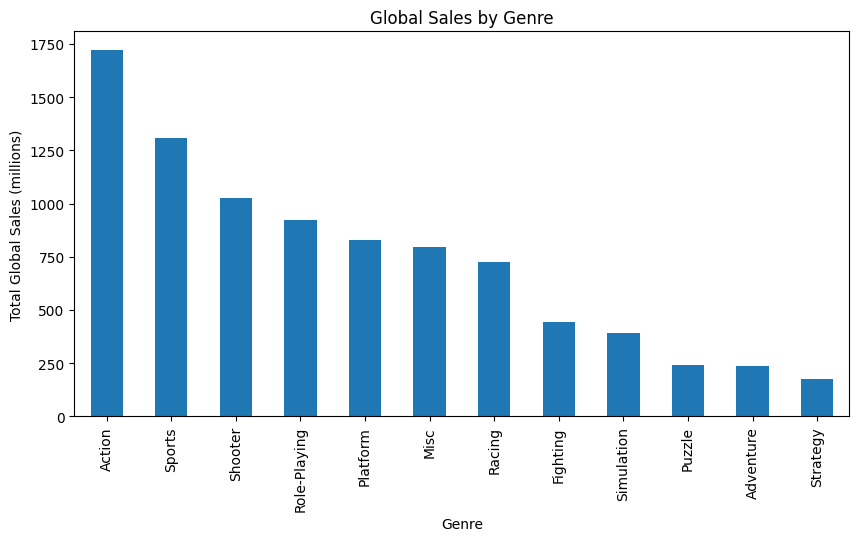

Sports: p=8.88625092188849e-73
Platform: p=8.32290206807517e-49
Racing: p=5.060330713383325e-56
Role-Playing: p=9.145002853571802e-59
Puzzle: p=1.2610745754891896e-43
Misc: p=5.968880152720379e-63
Shooter: p=1.3893081450978087e-53
Simulation: p=1.4196605384973607e-48
Action: p=1.0275904324577033e-73
Fighting: p=5.342092864066921e-43
Adventure: p=1.7351576409955933e-56
Strategy: p=3.2627905978374317e-41
Levene’s test p-value: 2.8499074860809504e-30
Kruskal–Wallis p-value: 1.2733255626029068e-201


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Action,1.000000e+00,4.201819e-111,5.599423e-02,9.956213e-05,1.729559e-09,1.374107e-14,6.940151e-01,6.295882e-01,2.863817e-05,1.103189e-03,1.492276e-05,1.369685e-24
Adventure,4.201819e-111,1.000000e+00,9.557097e-75,9.397347e-64,4.440272e-108,8.769966e-15,4.382726e-79,5.083236e-80,3.601887e-109,8.678178e-44,2.104606e-133,1.425154e-10
Fighting,5.599423e-02,9.557097e-75,1.000000e+00,6.469568e-06,1.337244e-03,6.233839e-15,1.744000e-01,3.932302e-02,1.507889e-01,4.102159e-05,2.780705e-01,1.093388e-22
Misc,9.956213e-05,9.397347e-64,6.469568e-06,1.000000e+00,9.241353e-17,1.419781e-06,5.431516e-04,4.473797e-03,5.933830e-12,8.229771e-01,2.209324e-13,3.049954e-12
Platform,1.729559e-09,4.440272e-108,1.337244e-03,9.241353e-17,1.000000e+00,5.547016e-27,1.045503e-06,1.030018e-08,3.741752e-02,1.678987e-13,5.045151e-03,3.150880e-38
Puzzle,1.374107e-14,8.769966e-15,6.233839e-15,1.419781e-06,5.547016e-27,1.000000e+00,8.379379e-13,1.224822e-11,3.482544e-22,3.549492e-05,1.612655e-23,1.369360e-01
Racing,6.940151e-01,4.382726e-79,1.744000e-01,5.431516e-04,1.045503e-06,8.379379e-13,1.000000e+00,4.636825e-01,1.784349e-03,1.863670e-03,3.055171e-03,1.251364e-20
Role-Playing,6.295882e-01,5.083236e-80,3.932302e-02,4.473797e-03,1.030018e-08,1.224822e-11,4.636825e-01,1.000000e+00,6.129531e-05,1.031534e-02,6.700383e-05,2.449936e-19
Shooter,2.863817e-05,3.601887e-109,1.507889e-01,5.933830e-12,3.741752e-02,3.482544e-22,1.784349e-03,6.129531e-05,1.000000e+00,2.497871e-09,5.644957e-01,3.383617e-33
Simulation,1.103189e-03,8.678178e-44,4.102159e-05,8.229771e-01,1.678987e-13,3.549492e-05,1.863670e-03,1.031534e-02,2.497871e-09,1.000000e+00,1.272044e-09,2.330224e-09


In [ ]:
global_genres = cleaned_df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
global_genres.head(12)
global_genres.describe()

global_genres.plot(kind="bar", figsize=(10,5), title="Global Sales by Genre")
plt.ylabel("Total Global Sales (millions)")
plt.xlabel("Genre")
plt.show()

#Tests for Normality
for g in cleaned_df["Genre"].unique():
  stat, p = shapiro(cleaned_df[cleaned_df["Genre"] == g]["Global_Sales"])
  print(f"{g}: p={p}") #all genres are not normally distributed

#Tests for Homogeneity of Variances
groups = [cleaned_df[cleaned_df["Genre"] == g]["Global_Sales"] for g in cleaned_df["Genre"].unique()] #create a series with values of global sales per genre
stat, p = levene(*groups)
print("Levene’s test p-value:", p) #did not satisfy levene's test of homogeneity, therefore variances are not homogenous

#Non-Parametric Test for relationship between Global Sales and Genre
stat, p = kruskal(*groups)
print("Kruskal–Wallis p-value:", p) #since p-value is less than standard 0.05, therefore atleast 1 pair of genres significantly differs from each other in global sales

#Post Hoc for Kruskal
sp.posthoc_dunn(cleaned_df, val_col='Global_Sales', group_col='Genre')




The Shapiro–Wilk test showed that all genres have non-normal global sales distributions, and Levene’s test indicated unequal variances across genres. Given these violations, a Kruskal–Wallis test was used and produced an extremely small p-value (1.27×10^201), confirming significant differences in global sales among genres. A Dunn’s post hoc test without adjustment revealed several genre pairs with p-values below 0.05, indicating distinct sales distributions. Overall, genre significantly affects global sales, with Action, Sports, and Role-Playing genres performing notably better than others.





#Top Genre by Year

,Year,Genre,Global_Sales
3,1980,Shooter,7.07
5,1981,Action,14.84
15,1982,Puzzle,10.03
22,1983,Platform,6.93
31,1984,Shooter,31.10
35,1985,Platform,43.17
40,1986,Action,13.74
48,1987,Fighting,5.42
54,1988,Platform,27.73
64,1989,Puzzle,37.75


<Axes: title={'center': 'Number 1 Genre of the Year Counts'}, xlabel='Genre', ylabel='Top Genre of the Year Count'>

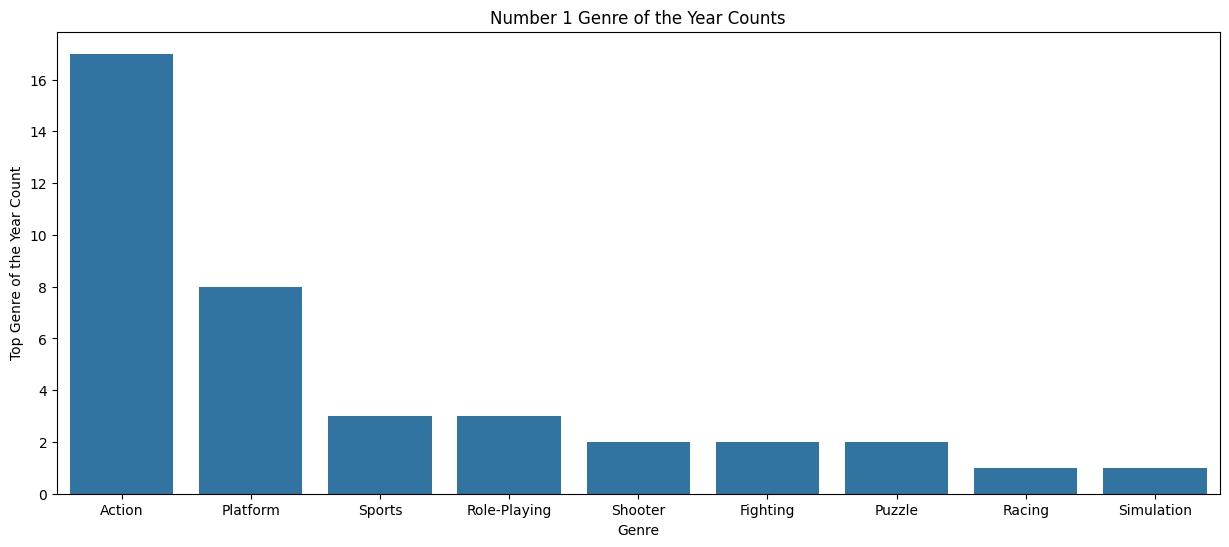

In [ ]:
top_genre_per_year = uncleaned_df.dropna(subset=['Year']).copy()
top_genre_per_year['Year'] = top_genre_per_year['Year'].astype(int)
top_genre_per_year = top_genre_per_year.groupby(["Year", "Genre"])["Global_Sales"].sum().reset_index()
top_genre_per_year = top_genre_per_year.loc[top_genre_per_year.groupby("Year")["Global_Sales"].idxmax()]
display(top_genre_per_year)

genre_counts = top_genre_per_year["Genre"].value_counts().reset_index()
genre_counts.columns = ["Genre", "Top Genre of the Year Count"]

plt.figure(figsize=(15,6))
plt.title("Number 1 Genre of the Year Counts")
sns.barplot(x="Genre", y="Top Genre of the Year Count", data=genre_counts)

In [ ]:
# Get the observed frequencies from the genre_counts DataFrame
observed_frequencies = genre_counts['Top Genre of the Year Count']

# Calculate the expected frequencies assuming an equal distribution across genres
# The total number of years is the sum of the observed frequencies
total_years = observed_frequencies.sum()
number_of_genres = len(observed_frequencies)
expected_frequency_per_genre = total_years / number_of_genres

# Create a list of expected frequencies (equal for each genre)
expected_frequencies = [expected_frequency_per_genre] * number_of_genres

# Perform the Chi-Squared Goodness-of-Fit test
chi2_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-Squared Statistic: 49.84615384615385
P-value: 4.3745938108980854e-08


The P-value acquired from the Chi-squared test statistic is 4.3745938108980854e-08, which shows that the frequency with which each genre becomes the top genre of the year differs significantly. This indicates that certain genres outperform others, which means that players are seeking specific types of genres from games.

> Add blockquote



# Multiple Linear Regression Model

This model with learn and try to predict the total sales based on the platform, genre, publisher, and year released. The reason is these variables are important factors in the consumers' decision whether to buy/play a game they see.

Modules

In [ ]:
from sklearn.linear_model import LinearRegression # import linear regression from scikit learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split #import for easier division of train and test parts of the data set

note: use clean_df_no_out from the data cleaning part to improve model accuracy

initialize the variables

In [ ]:
X = pd.get_dummies(cleaned_df_no_out[['Platform', 'Genre', 'Publisher']])
X['Year'] = cleaned_df_no_out['Year'] # add year in the dataframe for X
y = cleaned_df_no_out['Global_Sales']

Visualization of Platform and Sales

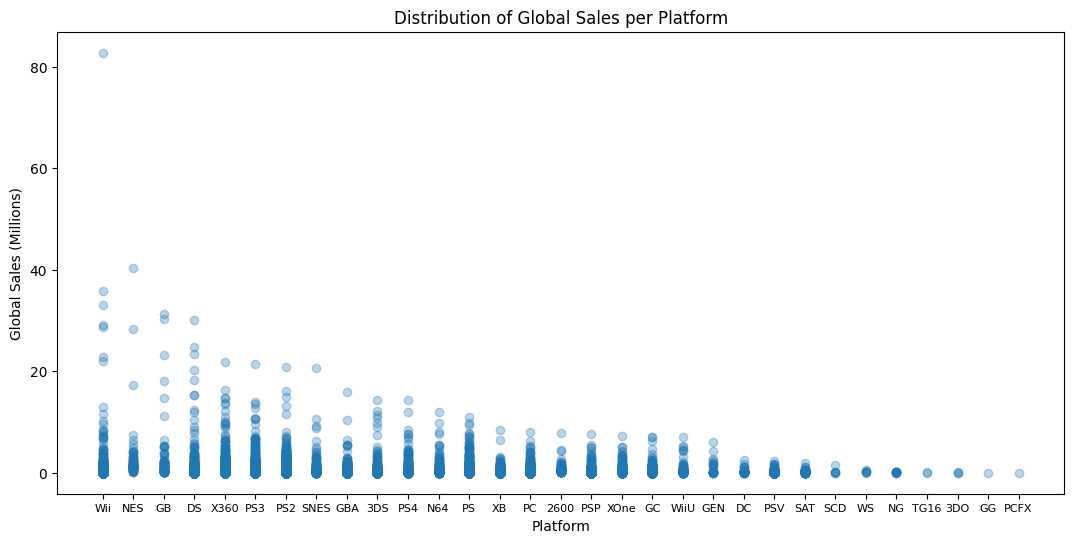

In [ ]:
plt.figure(figsize=(13,6))
plt.scatter(cleaned_df['Platform'], cleaned_df['Global_Sales'], alpha=0.3)
plt.xticks(fontsize=8)
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Global Sales per Platform')
plt.show()


Visualization of Genre and Sales

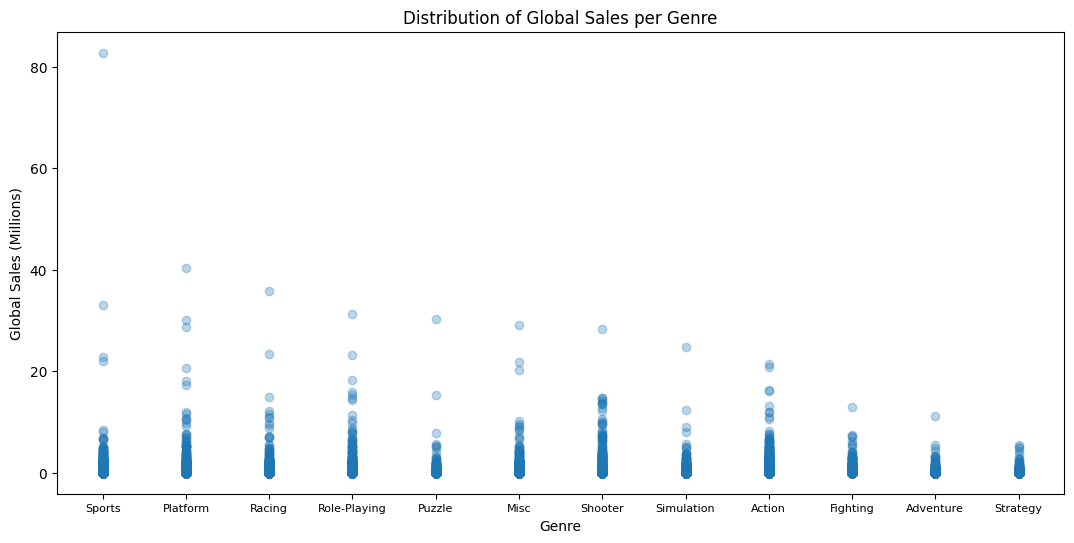

In [ ]:
plt.figure(figsize=(13,6))
plt.scatter(cleaned_df['Genre'], cleaned_df['Global_Sales'], alpha=0.3)
plt.xticks(fontsize=8)
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Global Sales per Genre')
plt.show()


Visualization of Publisher and Sales

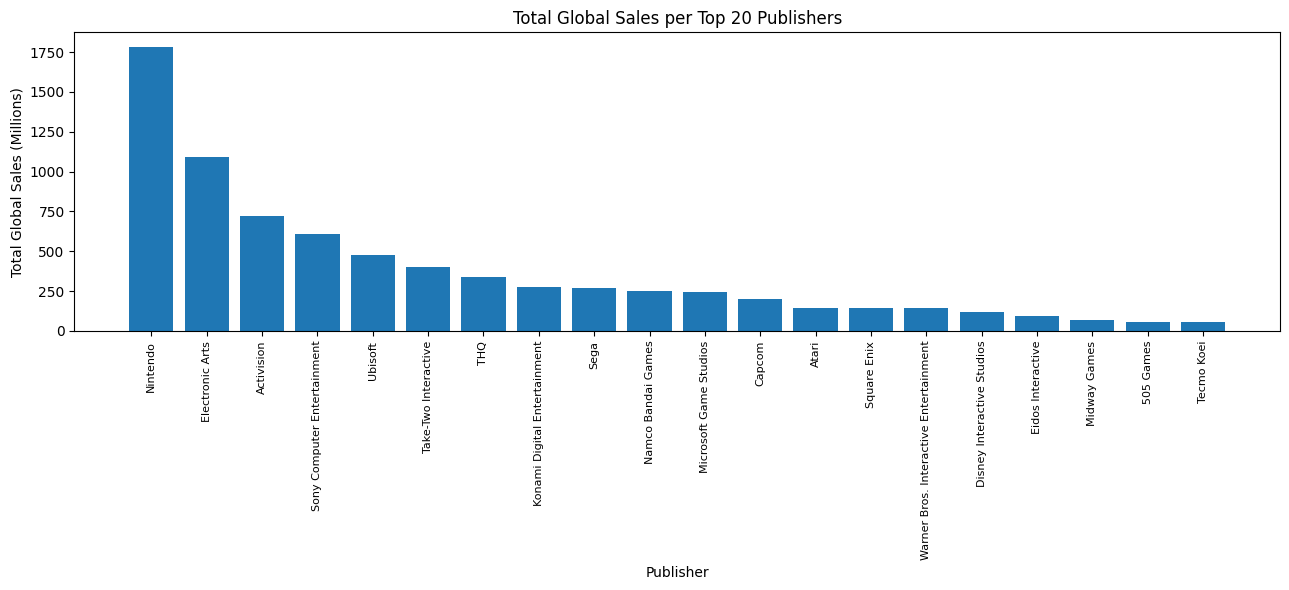

In [ ]:
top_publishers = cleaned_df['Publisher'].value_counts().head(20).index
avg_sales = cleaned_df[cleaned_df['Publisher'].isin(top_publishers)].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(13,6))
plt.bar(avg_sales.index, avg_sales.values)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (Millions)')
plt.title('Total Global Sales per Top 20 Publishers')
plt.tight_layout()
plt.show()

Creating the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # split the dataset
model = LinearRegression() # regression function
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted:': y_pred
})

print(results.head(20))

    Actual  Predicted:
0     0.10    0.145566
1     0.04    0.072820
2     0.07    0.127226
3     0.11    0.121201
4     0.31    0.154598
5     0.01    0.067482
6     0.17    0.141673
7     0.21    0.134835
8     0.16    0.207301
9     0.03    0.032789
10    0.07    0.075924
11    0.01    0.105816
12    0.01    0.119738
13    0.08    0.092442
14    0.13    0.153351
15    0.05    0.065012
16    0.05    0.116259
17    0.19    0.174526
18    0.26    0.179431
19    0.21    0.194088


Plot the model results of the actual and the predicted

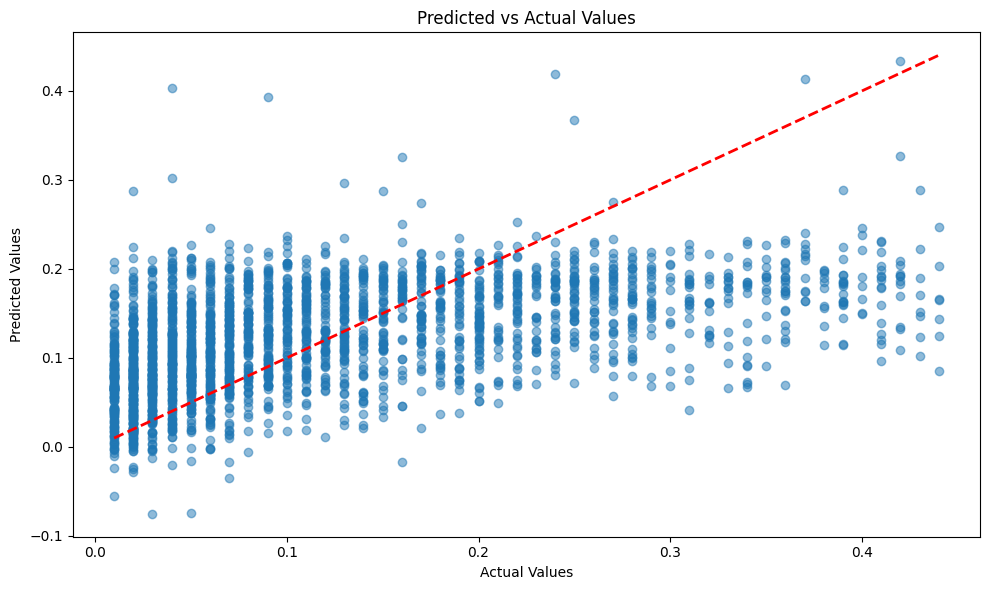

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

R^2 Score

In [ ]:
model.score(X_test, y_test)

0.25092764361266695

According to the visual plot and the R^2 results, the variables (except the sales) provided by the dataset are not enough to accurately predict the global sales. With a score of 0.2, it is not recommended to use this as a predictor, as there is simply not enough information to predict. I tried using the Random Forest Regression but it yielded even worse results with 0.05 to 0.15 test score. Therefore it can be concluded that the platform, genre, publisher, and year released are not enough determiners of global sales according to Linear Regression and Random Forest Regression.

# Exploration of Regional Sales relation to Global *Sales*

North America

In [ ]:
X = pd.get_dummies(cleaned_df_no_out[['NA_Sales']])
y = cleaned_df_no_out['Global_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y) # split the dataset
model = LinearRegression() # regression function
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted:': y_pred
})

print(results.head(20))

    Actual  Predicted:
0     0.11    0.138202
1     0.07    0.102760
2     0.11    0.126388
3     0.24    0.173644
4     0.35    0.232715
5     0.07    0.090946
6     0.12    0.161830
7     0.06    0.055503
8     0.05    0.031875
9     0.21    0.150016
10    0.05    0.031875
11    0.07    0.090946
12    0.40    0.374483
13    0.04    0.031875
14    0.17    0.185458
15    0.02    0.031875
16    0.12    0.067318
17    0.24    0.102760
18    0.12    0.138202
19    0.07    0.031875


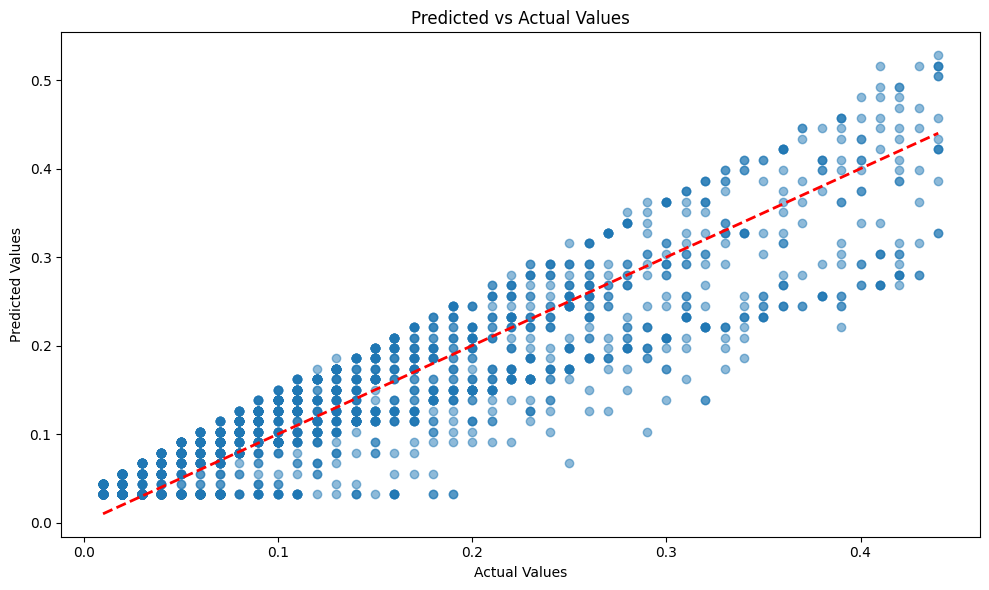

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

In [ ]:
model.score(X_test, y_test)

0.8443065016484834

According to the data, results in North America alone is a great predictor of the global sales, as it is the largest fanbase in these video games. With a R^2 score of 0.84, it greatly eclipses the previous model. This means that 84% of the variability of global sales is affected by sales in NA alone. It can be concluded that the global success of a game in highly dependent on its performance in North America

Europe



First 20 actual vs. predicted values for EU Sales model:
    Actual  Predicted:
0     0.28    0.122839
1     0.06    0.066157
2     0.19    0.122839
3     0.19    0.160626
4     0.42    0.273989
5     0.11    0.141732
6     0.07    0.122839
7     0.13    0.066157
8     0.27    0.255095
9     0.09    0.066157
10    0.39    0.349565
11    0.02    0.066157
12    0.01    0.066157
13    0.01    0.066157
14    0.04    0.085051
15    0.04    0.066157
16    0.04    0.085051
17    0.01    0.066157
18    0.03    0.085051
19    0.12    0.122839


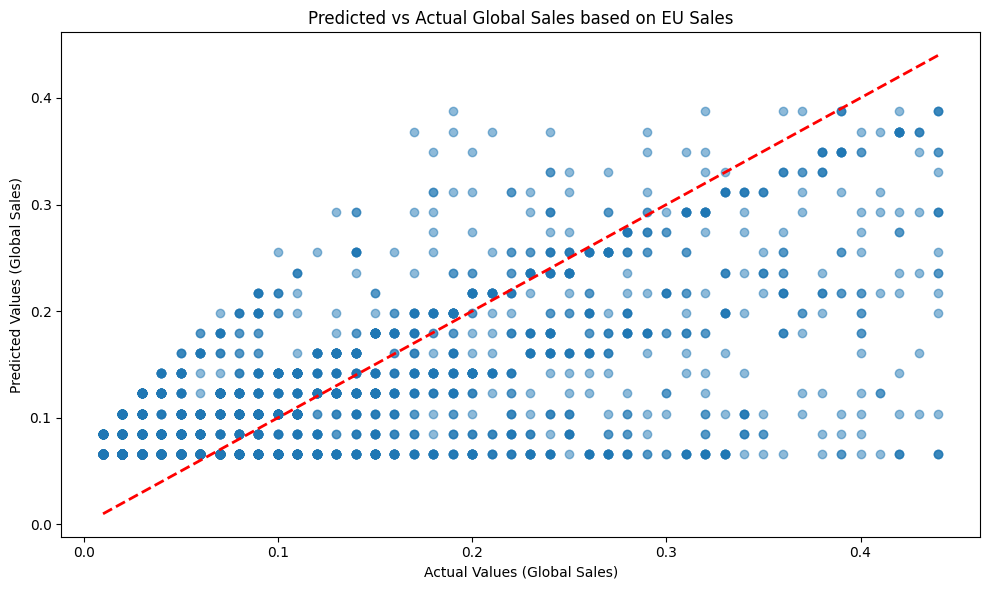

R^2 Score for EU Sales model: 0.45804714018504133


In [ ]:
X = cleaned_df_no_out[['EU_Sales']]
y = cleaned_df_no_out['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Split the dataset with a fixed random_state for reproducibility
model_eu = LinearRegression() # Initialize linear regression model for EU sales
model_eu.fit(X_train, y_train)
y_pred_eu = model_eu.predict(X_test)

results_eu = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted:': y_pred_eu
})

print("First 20 actual vs. predicted values for EU Sales model:")
print(results_eu.head(20))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_eu, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values (Global Sales)')
plt.ylabel('Predicted Values (Global Sales)')
plt.title('Predicted vs Actual Global Sales based on EU Sales')
plt.tight_layout()
plt.show()

r2_score_eu = model_eu.score(X_test, y_test)
print(f"R^2 Score for EU Sales model: {r2_score_eu}")

Compared to NA, sales in EU is significantly lower, amounting to only 45% of the variability of the global sales. This is because of the lower number of people who purchases games from that region compared to North America, in turn, it's ability to predict the global sales is subpar.

Japan

First 20 actual vs. predicted values for JP Sales model:
    Actual  Predicted:
0     0.28    0.092516
1     0.06    0.055676
2     0.19    0.129356
3     0.19    0.129356
4     0.42    0.129356
5     0.11    0.129356
6     0.07    0.092516
7     0.13    0.129356
8     0.27    0.129356
9     0.09    0.129356
10    0.39    0.129356
11    0.02    0.129356
12    0.01    0.117076
13    0.01    0.117076
14    0.04    0.129356
15    0.04    0.129356
16    0.04    0.129356
17    0.01    0.117076
18    0.03    0.129356
19    0.12    0.129356


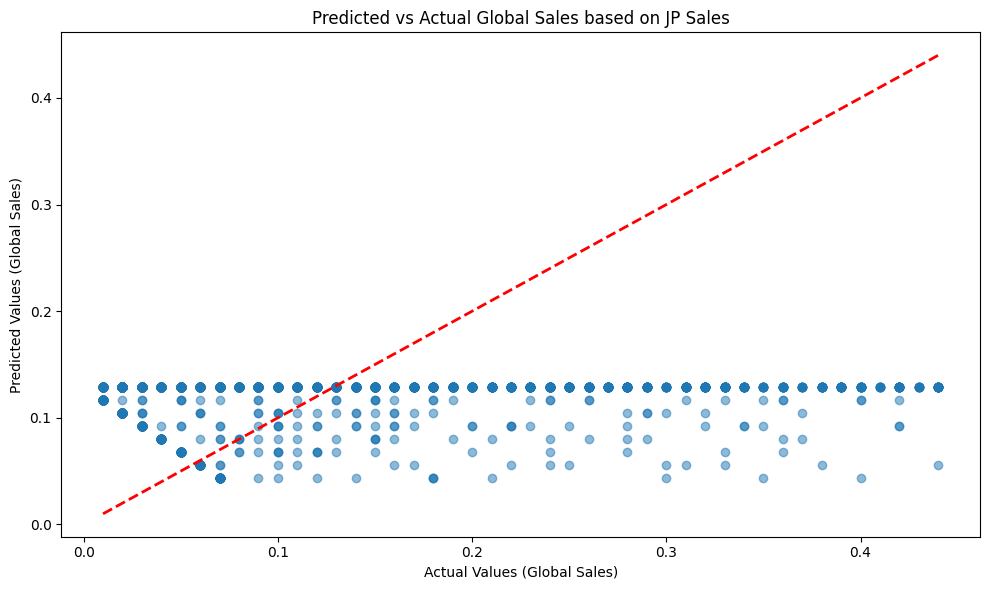

R^2 Score for JP Sales model: 0.033262545662708254


In [ ]:
X = cleaned_df_no_out[['JP_Sales']]
y = cleaned_df_no_out['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Split the dataset with a fixed random_state for reproducibility
model_jp = LinearRegression() # Initialize linear regression model for JP sales
model_jp.fit(X_train, y_train)
y_pred_jp = model_jp.predict(X_test)

results_jp = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted:': y_pred_jp
})

print("First 20 actual vs. predicted values for JP Sales model:")
print(results_jp.head(20))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_jp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values (Global Sales)')
plt.ylabel('Predicted Values (Global Sales)')
plt.title('Predicted vs Actual Global Sales based on JP Sales')
plt.tight_layout()
plt.show()

r2_score_jp = model_jp.score(X_test, y_test)
print(f"R^2 Score for JP Sales model: {r2_score_jp}")

Sales in JP is even lower than EU, amounting to a measly 3% of the variability of the global sales. As compared to other regions, Japan is only one country with lower population than any of the continents, which explains it's poor performance

Other Countries

First 20 actual vs. predicted values for Other Sales model:
    Actual  Predicted:
0     0.28    0.198291
1     0.06    0.058271
2     0.19    0.128281
3     0.19    0.058271
4     0.42    0.128281
5     0.11    0.128281
6     0.07    0.128281
7     0.13    0.128281
8     0.27    0.268300
9     0.09    0.128281
10    0.39    0.408320
11    0.02    0.058271
12    0.01    0.058271
13    0.01    0.058271
14    0.04    0.058271
15    0.04    0.058271
16    0.04    0.058271
17    0.01    0.058271
18    0.03    0.058271
19    0.12    0.058271


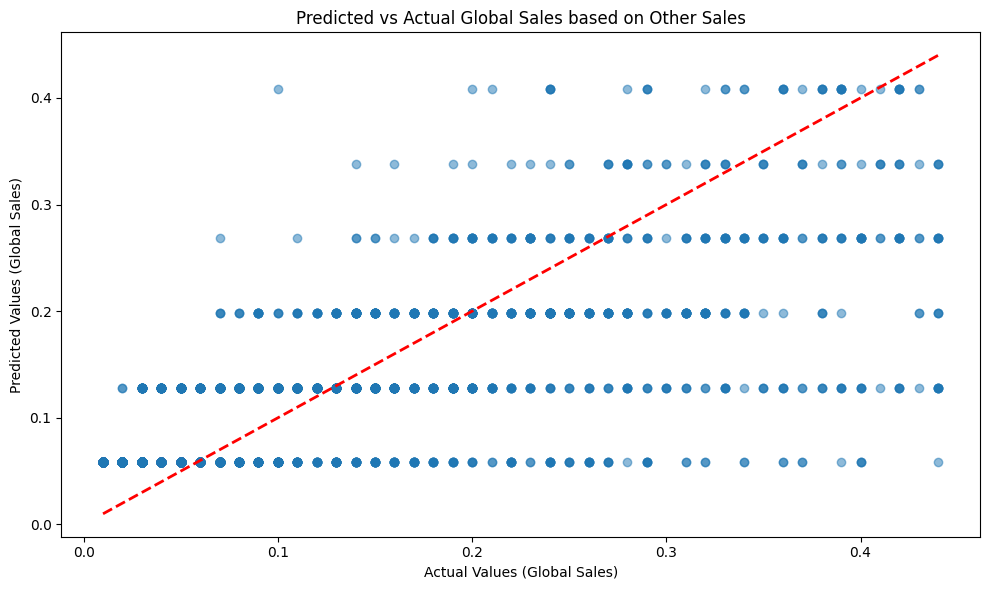

R^2 Score for Other Sales model: 0.5471778352792463


In [ ]:
X = cleaned_df_no_out[['Other_Sales']]
y = cleaned_df_no_out['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Split the dataset with a fixed random_state for reproducibility
model_other = LinearRegression() # Initialize linear regression model for Other sales
model_other.fit(X_train, y_train)
y_pred_other = model_other.predict(X_test)

results_other = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted:': y_pred_other
})

print("First 20 actual vs. predicted values for Other Sales model:")
print(results_other.head(20))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_other, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values (Global Sales)')
plt.ylabel('Predicted Values (Global Sales)')
plt.title('Predicted vs Actual Global Sales based on Other Sales')
plt.tight_layout()
plt.show()

r2_score_other = model_other.score(X_test, y_test)
print(f"R^2 Score for Other Sales model: {r2_score_other}")

For the other countries, its performance is still lower than NA, but is better than any other region observed. This is to be expected because of the number of countries and total population of these collection of nations. It amounts to 54% of the total variability of global sales, which is the second greatest.

# Final Testing

We have determined that regional sales are what affects global sales significantly, unlike the games' descriptive variables. So game developers should study and observe the video games preferred at regions where the variability rate is high. I will test the 2 regions with the most effect, which is Europe and NA, to help developers narrow down their target audience and at the same time have a greater chance of global success

First 20 actual vs. predicted values for Other Sales model:
    Actual  Predicted:
0     0.28    0.246810
1     0.06    0.014699
2     0.19    0.196986
3     0.19    0.198933
4     0.42    0.433966
5     0.11    0.118241
6     0.07    0.047514
7     0.13    0.134276
8     0.27    0.253626
9     0.09    0.094417
10    0.39    0.368107
11    0.02    0.024663
12    0.01    0.014699
13    0.01    0.014699
14    0.04    0.055532
15    0.04    0.044593
16    0.04    0.055532
17    0.01    0.014699
18    0.03    0.045567
19    0.12    0.137197


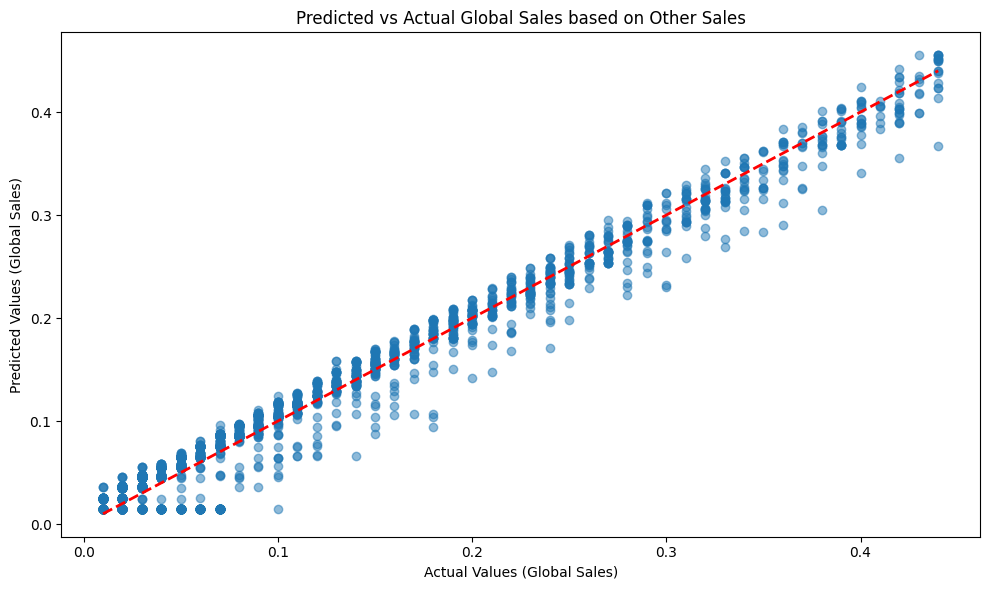

R^2 Score for Other Sales model: 0.9714453188274397


In [ ]:
X = cleaned_df_no_out[['NA_Sales', 'EU_Sales']]
y = cleaned_df_no_out['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # Split the dataset with a fixed random_state for reproducibility
model_other = LinearRegression() # Initialize linear regression model for Other sales
model_other.fit(X_train, y_train)
y_pred_other = model_other.predict(X_test)

results_other = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted:': y_pred_other
})

print("First 20 actual vs. predicted values for Other Sales model:")
print(results_other.head(20))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_other, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values (Global Sales)')
plt.ylabel('Predicted Values (Global Sales)')
plt.title('Predicted vs Actual Global Sales based on Other Sales')
plt.tight_layout()
plt.show()

r2_score_other = model_other.score(X_test, y_test)
print(f"R^2 Score for Other Sales model: {r2_score_other}")

Just by taking into account the performance of EU and NA, 97% of the variability is already explained. The focus of the developers is to study the gamer commmunity at those regions to find out which characteristcs have a common success and create the game from there to maximize the changes of global success.